# TASK 3: Evaluation von Input-Techniken

In dieser Studie werden verschiedene Eingabemethoden miteinander verglichen. Dazu zählt neben Maus und Touchpad auch eine gestenbasierte Eingabe. Außerdem wurde die Auswirkung von Latenz in Betracht gezogen. Dafür wurde reziproke Antippaufgabe verwendet. 

## Methodik

### Apperatus

Die Teilnehmer führten die Studie auf einem Macbook Air M1 2020 durch. Für die Eingabe wurden folgende Methoden verwendet:
- Maus (Logitech MX Anywhere 3)
- Maus (Logitech MX Anywhere 3) mit 150ms Latenz
- Touchpad (vom Macbook)
- gestenbasierte Eingabe durch eine Hand

Die gestenbasierte Eingabe erfolgte über die Handerkennung der Google MediaPipe. Dabei konnte der Mauszeiger über die Mitte der Hand (erstes Gelenk des Mittelfingers) gesteuert werden, wobei der Linksklick über die Berührung von Daumen und Zeigefinger erfolgte.

Bei der reziproken Antippaufgabe wurden 9 Kreise in einem UserInterface dargestellt. Dabei wurden für die Breite und den Abstand der Kreise alle Kombinationen aus 3 verschiedenen Werten verwendet. Diese wurden in einem Durchlauf automatisch durch das Programm geändert. Für jede dieser 9 Kombinationen mussten die Teilnehmer pro Gerät je 3 Wiederholungen durchlaufen. Bei jeder Möglichkeit wurden 9 Klicks auf Kreise erfasst. Der erste wurde dabei ignoriert. Damit wurden pro Teilnehmer und Gerät 243 Datenpunkte erfasst.

### Prozedur

Die Teilnehmer wurden begrüßt und gebeten, die Einverständniserklärung sorgfälltig durchzulesen und diese zu unterschreiben. 

Daraufhin sollte ein demographischer Fragebogen ausgefüllt werden, der neben Alter und Geschlecht auch die berufliche Situation und die Computernutzung erfasste.

Danach wurde ihnen das Vorgehen geschildert und die verschiedensten Eingabemethoden genau beschrieben. Ihnen wurde gesagt, dass sie mit verschiedenen Eingabegeräten aus vielen Kreisen jeweils den bunten so schnell wie möglich aber präzise anklicken sollen. Daraufhin wurde die Anwendung von der Versuchsleitung geöffnet und die richtigen Parameter eingestellt. Dem Teilnehmer wurde gesagt, welches Eingabegerät er verwenden soll und nochmals kurz die Nutzung erklärt. Die Erfassung startete dann mit dem ersten Klick. Sobald keine Kreise mehr angezeigt wurden, war die Aufgabe für das Eingabegerät beendet. Dergleiche Vorgang wurde auch für die anderen Eingabemethoden wiederholt. Wir haben die Reihenfolge der Eingabemethoden für jeden Teilnehmer variiert, um mögliche Lerneffekte auszugleichen. 

### Teilnehmer

An unserer Studie nahmen 3 Teilnehmer im Alter von 22 bis 56 Jahren teil (M = 33.67, SD = 19.348). Zwei davon identifizierten sich als weiblich, eine Personen als männlich. Alle Teilnehmer gaben an, die Maus als häufigste Eingabemethode zu verwenden. Außerdem hatte bisher ein Teilnehmer Erfahrungen mit gestenbasierter Eingabe.

## Ergebnisse

### Daten einlesen und zusammenführen

In [30]:
#parts of this notebook were generated with GPT
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [64]:
folder_path = 'study-data'
columns = ['id', 'participant_id', 'input_method', 'latency', 'duration', 'timestamp', 'distance', 'width', 'index_of_difficulty']

In [65]:
data_frames = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, header=None)
        df.columns = columns
        data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

combined_df

,id,participant_id,input_method,latency,duration,timestamp,distance,width,index_of_difficulty
0,2,participant1,gesture,0.0,2.629313,1.719509e+09,275.0,50.0,3.459432
1,3,participant1,gesture,0.0,1.397279,1.719509e+09,275.0,50.0,3.459432
2,4,participant1,gesture,0.0,1.648080,1.719509e+09,275.0,50.0,3.459432
3,5,participant1,gesture,0.0,11.148829,1.719509e+09,275.0,50.0,3.459432
4,6,participant1,gesture,0.0,1.920478,1.719509e+09,275.0,50.0,3.459432
...,...,...,...,...,...,...,...,...,...
2911,266,participant3,touchpad,0.0,0.847166,1.719589e+09,200.0,35.0,3.514573
2912,267,participant3,touchpad,0.0,0.798068,1.719589e+09,200.0,35.0,3.514573
2913,268,participant3,touchpad,0.0,0.698063,1.719589e+09,200.0,35.0,3.514573
2914,269,participant3,touchpad,0.0,0.547240,1.719589e+09,200.0,35.0,3.514573


### Auswertung

In [66]:
average_duration = combined_df.groupby(['participant_id', 'input_method', 'index_of_difficulty'])['duration'].mean().reset_index()

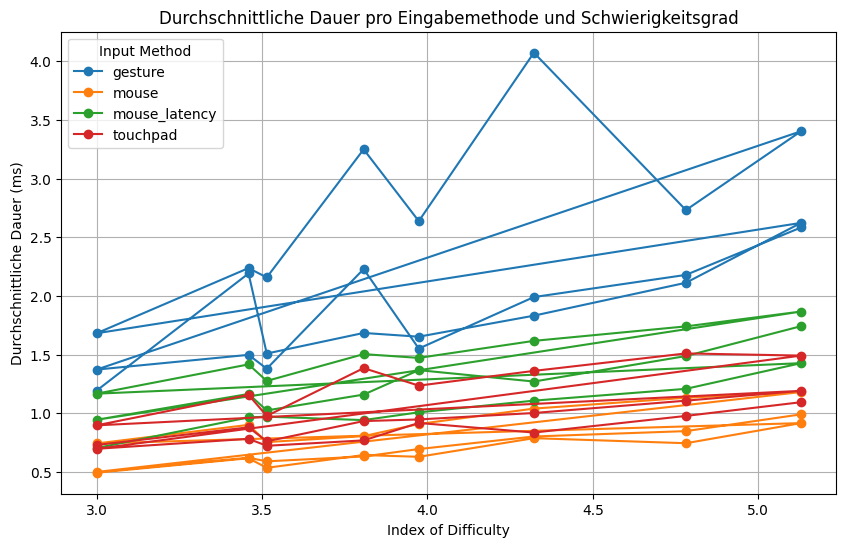

In [67]:
plt.figure(figsize=(10, 6))

for method in average_duration['input_method'].unique():
    method_data = average_duration[average_duration['input_method'] == method]
    plt.plot(method_data['index_of_difficulty'], method_data['duration'], marker='o', linestyle='-', label=method)

plt.title('Durchschnittliche Dauer pro Eingabemethode und Schwierigkeitsgrad')
plt.xlabel('Index of Difficulty')
plt.ylabel('Durchschnittliche Dauer (ms)')
plt.legend(title='Input Method')
plt.grid(True)

plt.show()

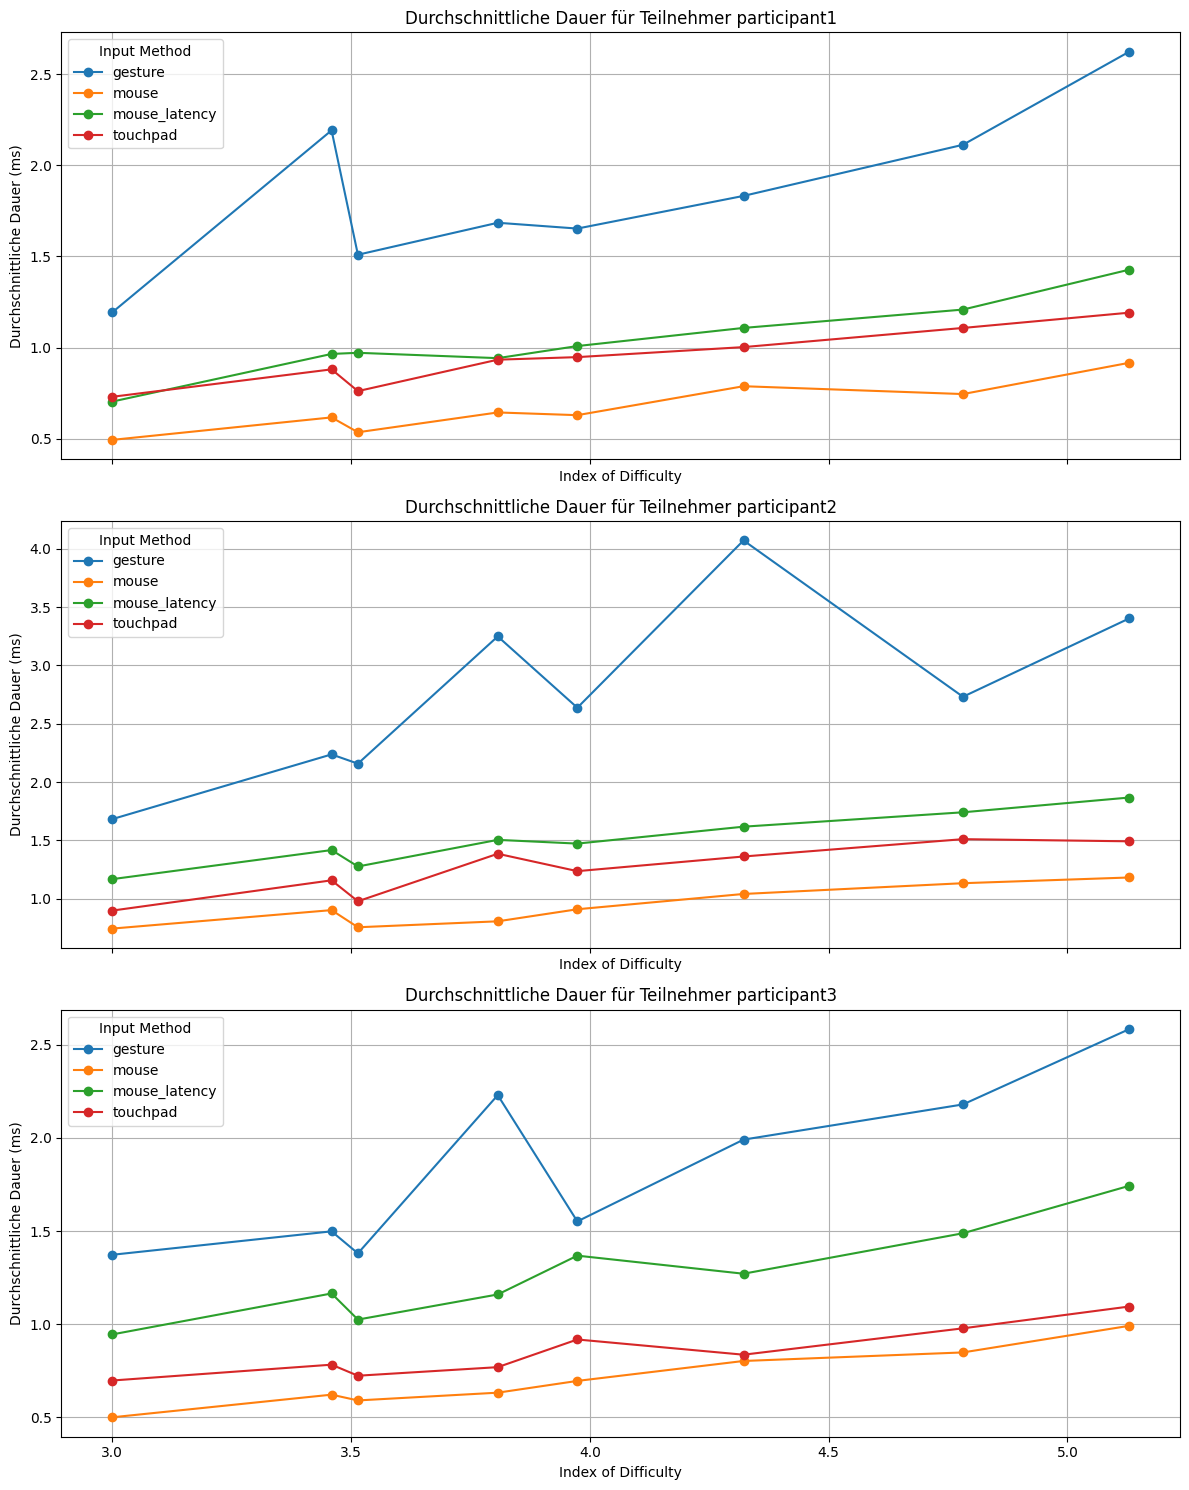

In [68]:
unique_participants = average_duration['participant_id'].unique()
num_participants = len(unique_participants)
fig, axes = plt.subplots(num_participants, 1, figsize=(12, 5 * num_participants), sharex=True)

if num_participants == 1:
    axes = [axes]

for ax, pid in zip(axes, unique_participants):
    participant_data = average_duration[average_duration['participant_id'] == pid]
    for method in participant_data['input_method'].unique():
        method_data = participant_data[participant_data['input_method'] == method]
        if not method_data.empty:
            ax.plot(method_data['index_of_difficulty'], method_data['duration'], marker='o', linestyle='-', label=method)
    
    ax.set_title(f'Durchschnittliche Dauer für Teilnehmer {pid}')
    ax.set_xlabel('Index of Difficulty')
    ax.set_ylabel('Durchschnittliche Dauer (ms)')
    ax.legend(title='Input Method')
    ax.grid(True)

plt.tight_layout()
plt.show()

Es handelt sich bei den dargestellten Werten um Durschnittswerte der Teilnehmer pro Eingabemethode für die verschiedenne Indizes of Difficulty. 
Es fällt auf, dass die Dauer auch mit steigendem Wert des Index of Difficulty steigt. Beim Input mit Gesten gab es dabei vereinzelt ausreißer, die wahrscheinlich auf die später beschriebene Problematik mit der Handerkennung am Rand des Bildschirms zurückzuführen ist.
Jeder Teilnehmer brauchte für die Eingabe per Geste am längsten, gefolgt von der Maus mit 150ms Latenz, dem Touchpad und einer normalen Maus.

Eingabemethode gesture: a = -0.29874889817536154, b = 0.6215945930044317


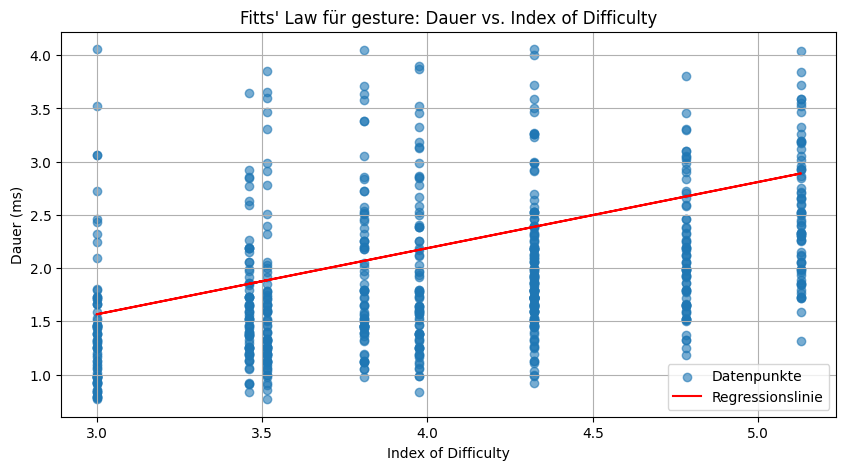

Eingabemethode mouse: a = -0.06980397297116747, b = 0.21165132545324383


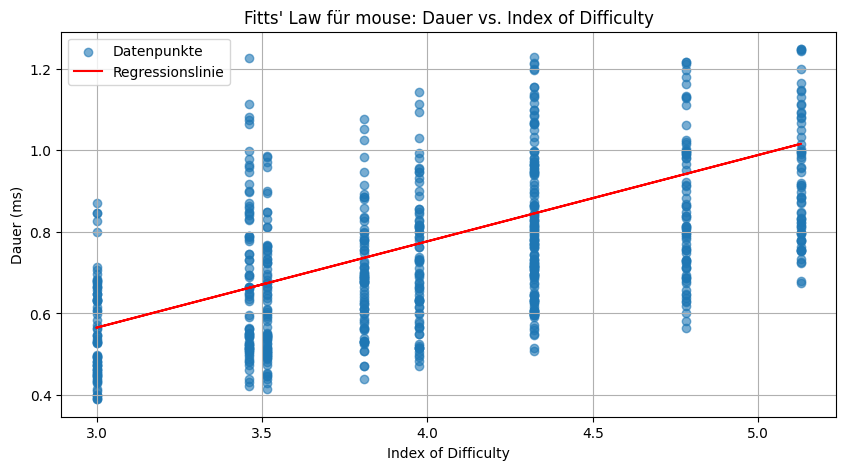

Eingabemethode mouse_latency: a = 0.019510248515898873, b = 0.31248716059439974


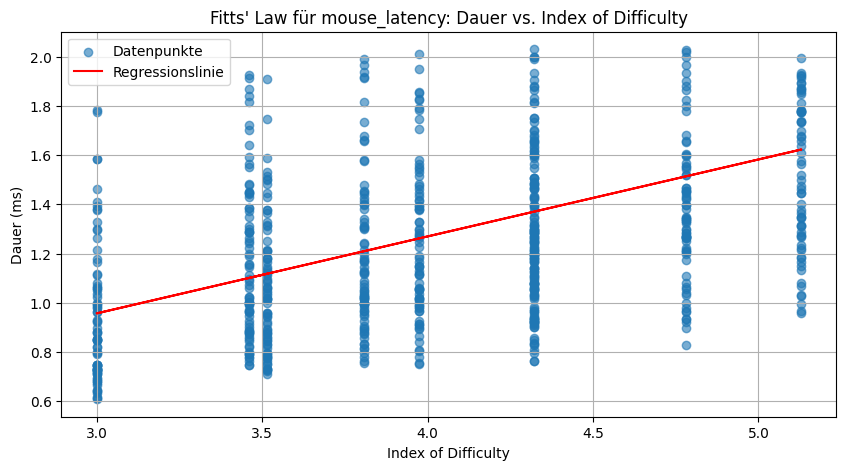

Eingabemethode touchpad: a = 0.11298289173357869, b = 0.22524884128059622


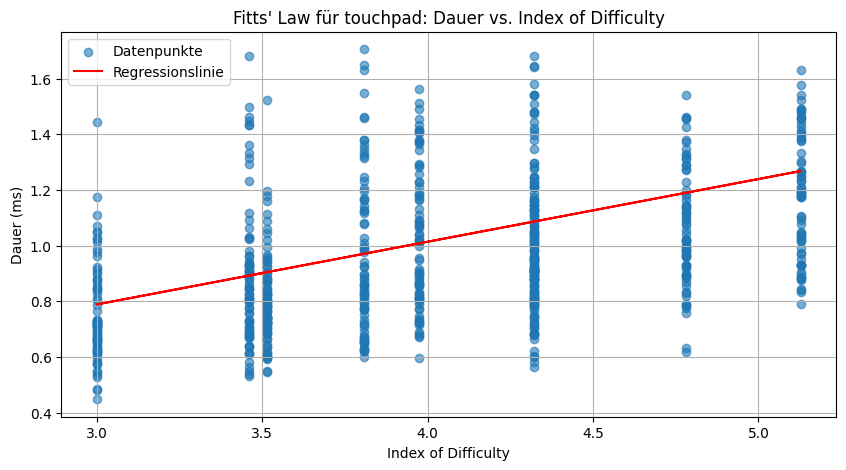

Input Method: gesture - a: -0.29874889817536154, b: 0.6215945930044317
Input Method: mouse - a: -0.06980397297116747, b: 0.21165132545324383
Input Method: mouse_latency - a: 0.019510248515898873, b: 0.31248716059439974
Input Method: touchpad - a: 0.11298289173357869, b: 0.22524884128059622


In [69]:
input_method_params = {}

for method in combined_df['input_method'].unique():
    method_data = combined_df[combined_df['input_method'] == method]
    X = method_data['index_of_difficulty']
    y = method_data['duration']

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    a, b = model.params

    input_method_params[method] = {'a': a, 'b': b}

    print(f'Eingabemethode {method}: a = {a}, b = {b}')

    # remove outliers for better visualization
    method_data = method_data[method_data['duration'] < method_data['duration'].quantile(0.95)]

    plt.figure(figsize=(10, 5))
    plt.scatter(method_data['index_of_difficulty'], method_data['duration'], label='Datenpunkte', alpha=0.6)
    plt.plot(method_data['index_of_difficulty'], a + b * method_data['index_of_difficulty'], color='red', label='Regressionslinie')
    plt.title(f'Fitts\' Law für {method}: Dauer vs. Index of Difficulty')
    plt.xlabel('Index of Difficulty')
    plt.ylabel('Dauer (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

for method, params in input_method_params.items():
    print(f'Input Method: {method} - a: {params["a"]}, b: {params["b"]}')

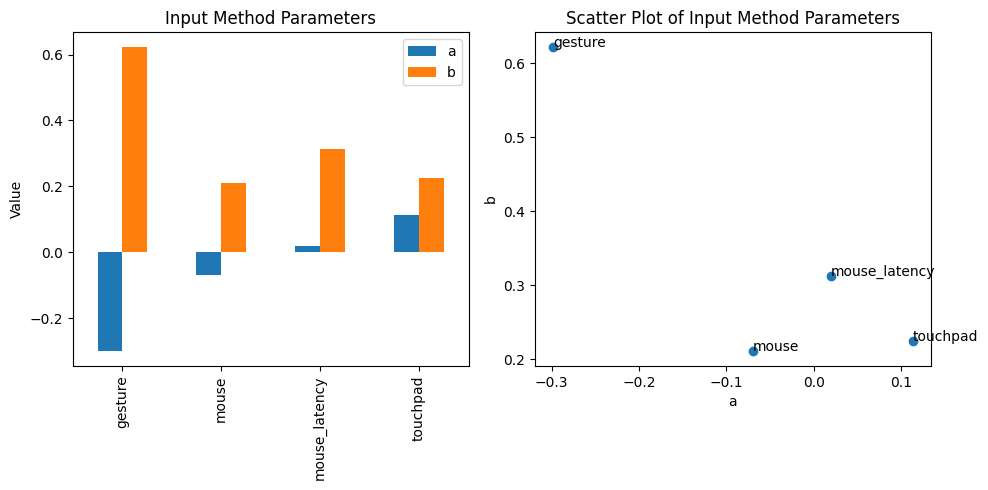

In [70]:
input_method_params = pd.DataFrame(input_method_params).T

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot
input_method_params.plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Value')
axs[0].set_title('Input Method Parameters')

# Scatter plot
axs[1].scatter(input_method_params['a'], input_method_params['b'])
axs[1].set_xlabel('a')
axs[1].set_ylabel('b')
axs[1].set_title('Scatter Plot of Input Method Parameters')
for i, txt in enumerate(input_method_params.index):
    axs[1].annotate(txt, (input_method_params['a'].iat[i], input_method_params['b'].iat[i]))

plt.tight_layout()
plt.show()



Die Analyse der Daten zeigt, dass die Eingabemethoden Maus und Touchpad ähnliche Steigungen aufweisen, wobei der y-Achsenabschnitt für die Maus niedriger ist. Dies deutet auf eine insgesamt leichtere Nutzung der Maus. 
Die Gestenbasierte Eingabe hat einen auffällig niedrigen Achsenabschnitt aufgrund ihrer hohen Steigung, was dazu führt, dass der Wert bei einem Index of Difficulty von 0 ins Negative fällt.

### Statistischer Test

In [29]:
print('Test for Sphericity:')
sphericity_results = pg.sphericity(data=combined_df, dv='duration', within='input_method', subject='participant_id')
print(sphericity_results)

aggregated_df = combined_df.groupby(['participant_id', 'input_method']).agg({'duration': 'mean'}).reset_index()

print('ANOVA Results:')
anova_model = AnovaRM(aggregated_df, depvar='duration', subject='participant_id', within=['input_method'])
anova_results = anova_model.fit()
print(anova_results)

print('\nPost-hoc Tukey HSD:')
posthoc = pairwise_tukeyhsd(aggregated_df['duration'], aggregated_df['input_method'], alpha=0.05)
print(posthoc)

Test for Sphericity:
SpherResults(spher=True, W=np.float64(14.001004985919444), chi2=np.float64(-1.9060376918175608), dof=5, pval=np.float64(1.0))
ANOVA Results:
                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
input_method 22.9950 3.0000 6.0000 0.0011


Post-hoc Tukey HSD:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
      gesture         mouse  -1.4249 0.0049 -2.3461 -0.5038   True
      gesture mouse_latency  -0.9288 0.0482 -1.8499 -0.0077   True
      gesture      touchpad  -1.1873  0.014 -2.1084 -0.2662   True
        mouse mouse_latency   0.4961 0.3719  -0.425  1.4172  False
        mouse      touchpad   0.2376 0.8408 -0.6835  1.1588  False
mouse_latency      touchpad  -0.2585 0.8061 -1.1796  0.6626  False
---------------------------------------------------------------

Zur Überprüfung der Wirkung verschiedener Eingabemethoden auf die Ausführungsdauer führten wir eine Varianzanalyse (ANOVA) für wiederholte Messungen durch. Zur Überprüfung der Annahme der Sphärizität verwendeten wir den Sphärizitätstest. Die Ergebnisse bestätigten, dass die Annahme der Sphärizität erfüllt ist (W = 14.001, p = 1.0). 
Die ANOVA zeigte einen signifikanten Unterschied in den Dauerwerten (F(3, 6) = 22.995, p = 0.0011), was darauf hindeutet, dass die Eingabemethode einen statistisch signifikanten Einfluss auf die Dauer hat.

Um die signifikanten Unterschiede zwischen den einzelnen Eingabemethoden weiter zu untersuchen, führten wir Tukey-HSD-Post-hoc-Tests durch. Die Ergebnisse sind in Tabelle 1 zusammengefasst. Die Tukey-HSD-Post-hoc-Tests zeigten, dass die Eingabemethode per Handgeste signifikant langsamer war als Mouse (p = 0.0049), Mouse_Latency (p = 0.0482), und Touchpad (p = 0.014). Zwischen Mouse, Mouse_Latency und Touchpad wurden keine signifikanten Unterschiede gefunden.

## Diskussion

Unsere Analyse zeigte, dass die Eingabemethode einen erheblichen Einfluss auf die Ausführungsdauer einer reziproken Antippaufgabe hat. Die Gesture-Eingabemethode war im Durchschnitt langsamer als die anderen Methoden, was darauf hindeutet, dass Gestenbasierte Interaktionen mehr Zeit erfordern könnten als traditionelle Zeigegeräte wie Mouse und Touchpad. Dies könnte auf die zusätzliche Komplexität und die notwendigen Verarbeitungszeiten für Gestenerkennung zurückzuführen sein.

Für zukünftige Untersuchungen könnten zusätzliche Faktoren wie die Aufgabenkomplexität, die Erfahrung der Benutzer mit den Eingabemethoden und deren Kontext der Nutzung berücksichtigt werden. Dies könnte ein umfassenderes Verständnis der Stärken und Schwächen jeder Eingabemethode bieten.

## Probleme

Es stellte sich für die Teilnehmer als schwierig dar, Objekte am Rand per Gesten zu selektieren, da dort die Hand nicht mehr zuverlässig erkannt werden konnte. Für die Zukunft empfielt es sich, das erfasste Kamerabild nicht in derselben Größe auf Bildschirm zu projezieren.

Ein Problem der Studie war es, die verschiedenen Distanzen und Breite der Ziele zu definieren, da wir kein erkennbares muster implementieren wollten. Dafür haben wir die Werte mit einem vorher gesetzten Seed zufällig generiert.

Ein weiteres Problem war das erzeugen einer realistischen Latenz. Da wir für die Versuchsdurchführung Pyglet verwendeten, konnte die Latenz nicht mit einfachen event-handlern simuliert werden, was ein flackern des Zeigers zur Folge hatte.